In [55]:
from data_prep import DataProcessor, Classement
data_path = '/Users/camille/repo/Hetic/projet_gouv/scraping/Data/google_reviews.csv'

columns = ['date', 'rate', 'review_text', 'object_address']

processor = DataProcessor(data_path)
processor.process_data(columns)
data = processor.data
#Load data2
location_path = '/Users/camille/repo/Hetic/projet_gouv/scraping/Data/location.csv'
# Vous pouvez accéder aux données transformées via l'attribut `data` de l'objet `proc ssor`


classment = Classement(data_path, location_path)
classment.load_data()
classment.load_location_data()
average_ratings_data = classment.get_average_ratings()



AttributeError: 'Classement' object has no attribute 'get_average_ratings'

In [50]:
classment = Classement(data_path, location_path)
classment.load_data()
classment.load_location_data()
average_ratings_data = classment.get_average_ratings()


AttributeError: 'Classement' object has no attribute 'get_average_ratings'

In [6]:
from geopy.geocoders import Nominatim
import pandas as pd
data = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/all_data/google_reviews_RGPD.csv')

geolocator = Nominatim(user_agent="my_app")  # Remplacez "my_app" par le nom de votre application
addresses = data['object_address'].unique()

for address in addresses:
    location = geolocator.geocode(address)
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
    else:
        print(f"Impossible de trouver les coordonnées pour l'adresse: {address}")


Impossible de trouver les coordonnées pour l'adresse: 29 Av. du Général de Gaulle, 52200 Langres
Impossible de trouver les coordonnées pour l'adresse: 47 Rue du Huit Mai, 63500 Issoire
Impossible de trouver les coordonnées pour l'adresse: 1 Terr. Front du Médoc, 33000 Bordeaux
Impossible de trouver les coordonnées pour l'adresse: 1 Av. Maréchal-Juin, 38800 Le Pont-de-Claix
Impossible de trouver les coordonnées pour l'adresse: 13 Bd Edgar Quinet, 79200 Parthenay
Impossible de trouver les coordonnées pour l'adresse: 128 Bd Président Wilson, 73100 Aix-les-Bains
Impossible de trouver les coordonnées pour l'adresse: 4 Rue René Buthaud, 33100 Bordeaux
Impossible de trouver les coordonnées pour l'adresse: 1 Rue du Bois des Fossés, 28100 Dreux
Impossible de trouver les coordonnées pour l'adresse: 51 Av. Général de Gaulle, 03100 Montluçon
Impossible de trouver les coordonnées pour l'adresse: 83 Av. de la Cr de France, 91260 Juvisy-sur-Orge
Impossible de trouver les coordonnées pour l'adresse: 2

KeyboardInterrupt: 

In [7]:
from geopy.geocoders import Nominatim
import pandas as pd

data = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/all_data/google_reviews_RGPD.csv')

geolocator = Nominatim(user_agent="my_app")  # Remplacez "my_app" par le nom de votre application
addresses = data['object_address'].unique()

count = 0
total = 0

for address in addresses:
    location = geolocator.geocode(address)
    if location is not None:
        count += 1
    total += 1

pourcentage_coordonnees = (count / total) * 100

print(f"Pourcentage de lieux avec coordonnées : {pourcentage_coordonnees}%")


Pourcentage de lieux avec coordonnées : 84.640522875817%


In [1]:
from geopy.geocoders import Nominatim
import pandas as pd

data = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/all_data/google_reviews_RGPD.csv')

geolocator = Nominatim(user_agent="my_app")  # Remplacez "my_app" par le nom de votre application
addresses = data['object_address'].unique()

coordinates = []

# Dictionnaire pour mettre en cache les coordonnées des villes déjà recherchées
cache = {}

for address in addresses:
    city = address.split(",")[-1].strip()  # Extraire le nom de la ville à partir de l'adresse
    
    # Vérifier si les coordonnées de la ville sont déjà en cache
    if city in cache:
        latitude, longitude = cache[city]
    else:
        location = geolocator.geocode(city)
        if location is not None:
            latitude = location.latitude
            longitude = location.longitude
            cache[city] = (latitude, longitude)  # Mettre les coordonnées en cache pour une utilisation ultérieure
        else:
            print(f"Impossible de trouver les coordonnées pour la ville: {city}")
            continue

    coordinates.append((address, latitude, longitude))

missing_coordinates = len(addresses) - len(coordinates)
pourcentage_coordonnees = (len(coordinates) / len(addresses)) * 100

print(f"Pourcentage de lieux avec coordonnées : {pourcentage_coordonnees}%")
print(f"Nombre de lieux sans coordonnées : {missing_coordinates}")

# Créer un DataFrame avec les coordonnées
df_coordinates = pd.DataFrame(coordinates, columns=['address', 'latitude', 'longitude'])
data.rename(columns={'object_address': 'address'}, inplace=True)
# Fusionner les coordonnées avec le DataFrame d'origine
data = pd.merge(data, df_coordinates, on='address', how='left')

# Enregistrer les données avec les coordonnées dans un fichier CSV
data.to_csv('data_with_coordinates.csv', index=False)


Pourcentage de lieux avec coordonnées : 100.0%
Nombre de lieux sans coordonnées : 0


In [9]:
# Créer un DataFrame avec les coordonnées
df_coordinates = pd.DataFrame(coordinates, columns=['address', 'latitude', 'longitude'])
data.rename(columns={'object_address': 'address'}, inplace=True)
# Fusionner les coordonnées avec le DataFrame d'origine
data = pd.merge(data, df_coordinates, on='address', how='left')

# Enregistrer les données avec les coordonnées dans un fichier CSV
data.to_csv('data_with_coordinates.csv', index=False)

In [21]:
import plotly.express as px
df_grouped = data.groupby('address').agg({'rate': [('average_rate', 'mean'), ('review_count', 'count')], 'latitude': 'first', 'longitude': 'first'}).reset_index()
df_grouped.columns = ['address', 'average_rate', 'review_count', 'latitude', 'longitude']

df_grouped['average_rate'] = df_grouped['average_rate'].round(1)

map = px.scatter_mapbox(df_grouped, lat=df_grouped.latitude, lon=df_grouped.longitude, hover_name="address", hover_data=["average_rate", "review_count"])
map.show()


In [1]:
import pandas as pd
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

data = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/all_data/google_reviews_RGPD.csv')
#telecharger les stopwords en francais
nltk.download('stopwords')

#telecharger les ponctuations
nltk.download('punkt')
#telecharger les lemmatizer
nltk.download('wordnet')
#Nettoyage des données
#Supprimer les stopwords
stop_words = set(stopwords.words('french'))
#Supprimer les ponctuations
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
#Lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    #Supprimer les stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    #Supprimer les ponctuations
    text = ''.join([char for char in text if char not in punctuations])
    #Lemmatizer
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    #Supprimer les chiffres
    text = re.sub(r'\d+', '', text)
    return text
reviews = data['review_text'].astype(str)
reviews = reviews.apply(lambda x: clean_text(x))

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.5.5-cp310-cp310-macosx_11_0_arm64.whl (288 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
You should consider upgrading via the '/Users/camille/repo/Hetic/projet_gouv/scraping/clean_data_env/bin/python3 -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/camille/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/camille/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/camille/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
reviews = data['review_text'].astype(str)
reviews = reviews.apply(lambda x: clean_text(x))

In [7]:
from collections import Counter
#Compter les mots
words = []
for review in reviews:
    for word in review.split():
        words.append(word)
    


In [10]:
from collections import Counter

# Compter les mots
words = []
for review in reviews:
    for word in review.split():
        if len(word) >= 3 and word != "nan":
            words.append(word)

word_counts = Counter(words)
word_counts.most_common(1000)


[('emploi', 2333),
 ('très', 1767),
 ('plus', 1545),
 ('bien', 1390),
 ('faire', 1296),
 ('rien', 1284),
 ('pôle', 1255),
 ('cest', 1246),
 ('tout', 1137),
 ('jai', 1112),
 ('conseillère', 1000),
 ('fait', 934),
 ('sans', 855),
 ('travail', 833),
 ('conseiller', 827),
 ('personne', 826),
 ('car', 738),
 ('service', 724),
 ('formation', 718),
 ('personnes', 713),
 ('toujours', 681),
 ('quand', 680),
 ('gen', 676),
 ('cette', 668),
 ('jamais', 667),
 ('mois', 654),
 ('agence', 653),
 ('personnel', 635),
 ('conseillers', 618),
 ('temp', 614),
 ('bon', 611),
 ('demande', 607),
 ('fois', 607),
 ('comme', 605),
 ('avoir', 603),
 ('dossier', 598),
 ('rdv', 570),
 ('Pôle', 568),
 ('Très', 566),
 ('alors', 565),
 ('accueil', 561),
 ('téléphone', 550),
 ('être', 544),
 ('mail', 540),
 ('Jai', 521),
 ('Merci', 501),
 ('dire', 495),
 ('dit', 493),
 ('faut', 469),
 ('vraiment', 467),
 ('nest', 455),
 ('leurs', 446),
 ('rendezvous', 445),
 ('Une', 441),
 ('question', 438),
 ('aucune', 434),
 ('dempl

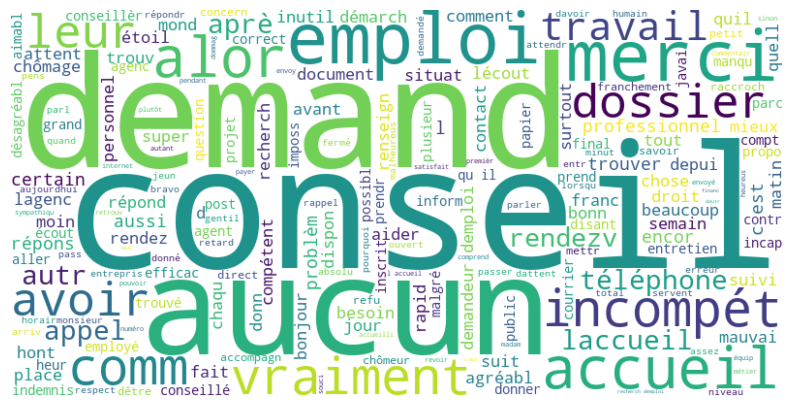

In [23]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Compter les mots
words = []
for review in reviews:
    for word in review.split():
        if len(word) > 4 and word != "nan":
            words.append(word)

word_counts = Counter(words)
most_common_words = word_counts.most_common(15)
top_words = [word for word, count in most_common_words]
filtered_words = [word for word in words if word not in top_words]
filtered_words = [word.lower() for word in filtered_words]
#stemming sur les mots
from nltk.stem import PorterStemmer
ps = PorterStemmer()
filtered_words = [ps.stem(word) for word in filtered_words]
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [24]:
word_counts = Counter(filtered_words)
#lowercase de tous les mots
filtered_words = [word.lower() for word in filtered_words]
word_counts.most_common(1000)

[('conseil', 1159),
 ('aucun', 1051),
 ('demand', 975),
 ('accueil', 969),
 ('merci', 878),
 ('comm', 671),
 ('alor', 643),
 ('incompét', 631),
 ('avoir', 615),
 ('dossier', 610),
 ('emploi', 586),
 ('téléphone', 563),
 ('répons', 552),
 ('vraiment', 542),
 ('aprè', 514),
 ('demploi', 482),
 ('rendezv', 470),
 ('travail', 461),
 ('leur', 454),
 ('depui', 450),
 ('question', 447),
 ('personnel', 445),
 ('tout', 431),
 ('laccueil', 423),
 ('trouver', 423),
 ('autr', 422),
 ('agréabl', 421),
 ('bonn', 419),
 ('problèm', 414),
 ('professionnel', 404),
 ('lécout', 400),
 ('mettr', 383),
 ('document', 380),
 ('étoil', 380),
 ('appel', 379),
 ('encor', 377),
 ('droit', 353),
 ('beaucoup', 352),
 ('besoin', 352),
 ('chose', 347),
 ('aider', 342),
 ('just', 335),
 ('certain', 333),
 ('grand', 324),
 ('demandeur', 321),
 ('chômage', 321),
 ('aussi', 320),
 ('place', 319),
 ('recherch', 314),
 ('c’est', 313),
 ('quil', 312),
 ('mieux', 298),
 ('matin', 297),
 ('désagréabl', 293),
 ('suivi', 292),